<a href="https://colab.research.google.com/github/izaleme/CienciaDeDados/blob/main/Decision_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Atividade 2 de CDD II - Izabela**

***Esse trabalho foi feito usando Regressão Logística e SKLearn***

***`Importa a biblioteca do google drive`***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***`Importa as bibliotecas que serão necessárias`***

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

***`Carrega e exibe as estatísticas do dataset`***

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Datas/iris.data.txt") # Carrega o dataset
dataset.describe() # Exibe as estatísticas

,5.1,3.5,1.4,0.2
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


***`Aqui o conjunto de dados será dividido em conjunto de treinamento e conjunto de teste`***

In [ ]:
dataset.info() # Informações do dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


***`Dimensiona os recursos do dataset`***

In [ ]:
X = dataset.iloc[:, [0,1,2, 3]].values # Pega as 4 primeiras colunas (0 a 3)
y = dataset.iloc[:, 4].values # Pega o valor do da coluna 4 (variável resposta)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

***`Adequa a regressão logística ao conjunto de treinamento`***

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression # Importação do sklearn
classifier = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto') # Definição de hiper parâmetros
classifier.fit(X_train, y_train) # Ajuste

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

***`Prevendo os resultados e as probabilidades do conjunto de testes`***

In [ ]:
# Predicting the Test set results (Prevê os resultados do conjunto de testes)
y_pred = classifier.predict(X_test) #x_test é uma matriz de teste

# Predict probabilities (Prevê probabilidades)
probs_y=classifier.predict_proba(X_test)

probs_y = np.round(probs_y, 2)

***`Printa os resultados`***

In [ ]:
res = "{:<10} | {:<10} | {:<10} | {:<13} | {:<5}".format("y_test", "y_pred", "Setosa(%)", "versicolor(%)", "virginica(%)\n")
res += "-"*65+"\n"
res += "\n".join("{:<10} | {:<10} | {:<10} | {:<13} | {:<10}".format(x, y, a, b, c) for x, y, a, b, c in zip(y_test, y_pred, probs_y[:,0], probs_y[:,1], probs_y[:,2]))
res += "\n"+"-"*65+"\n"
print(res)

y_test     | y_pred     | Setosa(%)  | versicolor(%) | virginica(%)
-----------------------------------------------------------------
Iris-virginica | Iris-versicolor | 0.0        | 0.64          | 0.35      
Iris-virginica | Iris-virginica | 0.0        | 0.13          | 0.86      
Iris-versicolor | Iris-versicolor | 0.01       | 0.98          | 0.01      
Iris-versicolor | Iris-versicolor | 0.02       | 0.97          | 0.01      
Iris-setosa | Iris-setosa | 0.93       | 0.07          | 0.0       
Iris-virginica | Iris-virginica | 0.0        | 0.02          | 0.98      
Iris-virginica | Iris-virginica | 0.0        | 0.04          | 0.96      
Iris-versicolor | Iris-versicolor | 0.06       | 0.87          | 0.07      
Iris-virginica | Iris-versicolor | 0.0        | 0.73          | 0.27      
Iris-versicolor | Iris-versicolor | 0.11       | 0.56          | 0.33      
Iris-setosa | Iris-setosa | 0.93       | 0.07          | 0.0       
Iris-setosa | Iris-setosa | 0.9        | 0.1          

***`Criando a Matriz de Confusão`***

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[13  1  0]
 [ 0 13  1]
 [ 0  4  6]]


***`Matriz de confusão de plotagem`***

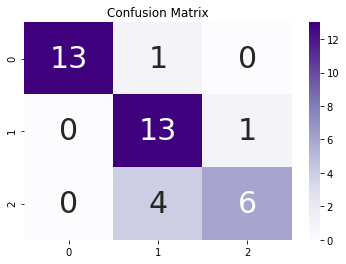

In [ ]:
# Confusion matrix sns heatmap (Mapa de calor)

import seaborn as sns
import pandas as pd

ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Purples", ax = ax )
ax.set_title('Confusion Matrix') # Título
plt.show() # Mostra o mapa de calor matriz de confusão